Connected to venv (Python 3.11.5)

In [3]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf

In [24]:
# get files
path = "./rock_paper_scissors/"
files = os.listdir(path)

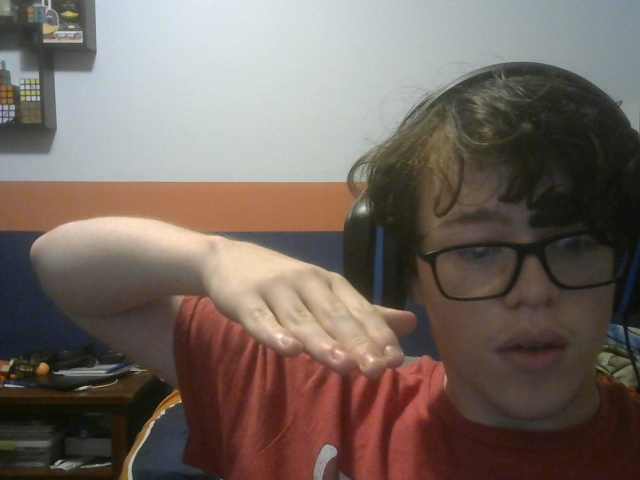

In [30]:
PIL.Image.open(path + "train/paper0.jpg")

In [26]:
batch_size = 2
img_height = 640
img_width = 480

In [27]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    path,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 15 files belonging to 2 classes.
Using 12 files for training.


In [31]:
val_ds = tf.keras.utils.image_dataset_from_directory(
    path,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 15 files belonging to 2 classes.
Using 3 files for validation.


In [33]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

In [35]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [36]:
num_classes = 3

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

In [37]:
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [39]:
model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=3
)

Epoch 1/3


6/6 [==============================] - 3s 551ms/step - loss: 0.1862 - accuracy: 0.9167 - val_loss: 2.1298 - val_accuracy: 0.3333
Epoch 2/3
6/6 [==============================] - 3s 557ms/step - loss: 0.1313 - accuracy: 0.9167 - val_loss: 2.2343 - val_accuracy: 0.3333
Epoch 3/3
6/6 [==============================] - 3s 556ms/step - loss: 0.0544 - accuracy: 1.0000 - val_loss: 3.5567 - val_accuracy: 0.3333


In [46]:
test_images_path = "./images/"
test_images = os.listdir(test_images_path)


In [59]:
# predict on one image
img = tf.keras.preprocessing.image.load_img(
    test_images_path + test_images[0], target_size=(img_height, img_width)
)

In [60]:
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])


1/1 [==============================] - 0s 62ms/step


In [61]:
np.argmax(score) 

0

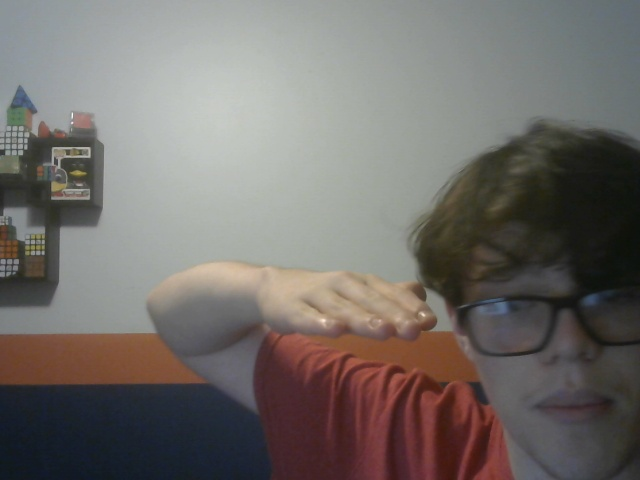

In [57]:
# display imag3e
PIL.Image.open(test_images_path + test_images[0])

In [58]:
# disp;ay label
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(files[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to train with a 99.23 percent confidence.
